# Classification Systems
In this practical, you are asked to compare the prediction error of:

- The Naive Bayes Classifier
- LDA.
- QDA.
- Nearest Shrunken Centroids Classifier.


In [14]:
import numpy as np
from scipy import linalg
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import colors
import sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix
from sklearn.neighbors import NearestCentroid
import pandas as pd
import scipy.stats as stats
import scipy as sp
from sklearn.naive_bayes import GaussianNB
matplotlib.rc('figure', figsize=(15, 5))
import warnings
warnings.filterwarnings('ignore')
from lazypredict.Supervised import LazyClassifier as LC

## Loading the Data

We load both datasets from csv

In [15]:
import pandas as pd
df_1 = pd.read_json('prueba_v7_1_json_for_pandas.json')

In [16]:
columns = [item.replace('+', 'plus') for item in df_1.columns.values]
columns = [item.replace('-', '_') for item in df_1.columns.values]
df_1.columns = columns

1 ['variantInternalId'] ['LoFtool', 'LIST_S2_score', 'POPAF', 'M_CAP_rankscore', 'GM12878_fitCons_rankscore', 'LIST_S2_rankscore', 'phastCons17way_primate_rankscore', 'DEOGEN2_score', 'Reliability_index', 'MetaLR_score', 'bStatistic_converted_rankscore', 'COSMIC_N_MATCH', 'MetaSVM_rankscore', 'PROVEAN_converted_rankscore', 'Polyphen2_HVAR_score', 'MetaSVM_score', 'H1_hESC_fitCons_rankscore', 'SIFT_converted_rankscore', 'Polyphen2_HDIV_score', 'HUVEC_fitCons_rankscore', 'phastCons17way_primate', 'FATHMM_score', 'GM12878_confidence_value', 'MutationAssessor_score', 'REVEL_score', 'INTERNALLY_IDENTIFIED', 'PREVIOUSLY_IDENTIFIED', 'ARTIFACTS', 'LONGITUDINAL_BOTH', 'DRIVER']


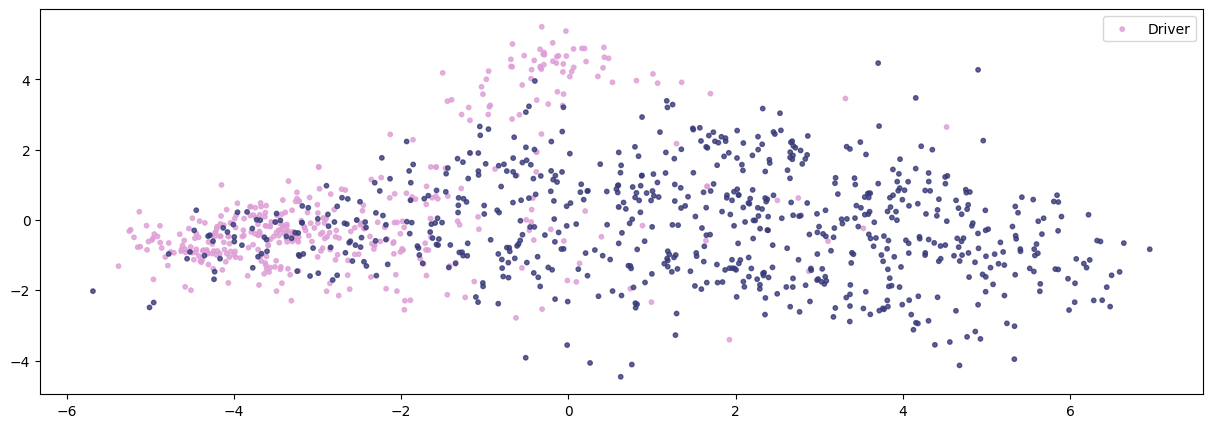

In [20]:
df_1 = df_1[df_1['FILTER_2']==1]
#df_1['INTERNALLY_IDENTIFIED'] = df_1['INTERNALLY_IDENTIFIED'].fillna('False')
df_1 = df_1[df_1['ref'] != '']
df_1 = df_1[df_1['ref'].notnull()]
df = df_1.loc[:,['LoFtool',
 'LIST_S2_score',
 'POPAF',
 'M_CAP_rankscore',
 'GM12878_fitCons_rankscore',
 'LIST_S2_rankscore',
 'phastCons17way_primate_rankscore',
 'DEOGEN2_score',
 'Reliability_index',
 'MetaLR_score',
 'bStatistic_converted_rankscore',
 'COSMIC_N_MATCH',
 'MetaSVM_rankscore',
 'PROVEAN_converted_rankscore',
 'Polyphen2_HVAR_score',
 'MetaSVM_score',
 'H1_hESC_fitCons_rankscore',
 'SIFT_converted_rankscore',
 'Polyphen2_HDIV_score',
 'HUVEC_fitCons_rankscore',
 'phastCons17way_primate',
 'FATHMM_score',
 'GM12878_confidence_value',
 'MutationAssessor_score',
 'REVEL_score', 
 'INTERNALLY_IDENTIFIED', 'PREVIOUSLY_IDENTIFIED', 'ARTIFACTS', 'variantInternalId', 'LONGITUDINAL_BOTH']]
"""
df = df_1.loc[:,['LoFtool', 'MEAN_VAF', 'MAX_VAF', 'Reliability_index', 'Gene',
       'M_CAP_rankscore', 'PROVEAN_converted_rankscore', 'LIST_S2_score',
       'MetaLR_score', 'POPAF', 'MetaSVM_score', 'Polyphen2_HVAR_rankscore',
       'BayesDel_noAF_rankscore', 'Polyphen2_HDIV_rankscore',
       'MetaSVM_rankscore', 'COSMIC_N_MATCH', 'CADD_raw_rankscore',
       'MetaRNN_rankscore', 'MPOS', 'STRANDQ', 'GM12878_confidence_value',
       'DANN_score', 'SIFT_converted_rankscore', 'STRAND',
       'phyloP30way_mammalian_rankscore', 'BayesDel_noAF_score',
       'FATHMM_score', 'ECNT', 'MPC_score', 'BayesDel_addAF_rankscore',
       'MetaRNN_score', 'fathmm_MKL_coding_rankscore', 'DEOGEN2_score',
       'Polyphen2_HVAR_score', 'DP', 'DEOGEN2_rankscore', 'ClinPred_score',
       'MetaLR_rankscore', 'ClinPred_rankscore',
       'integrated_fitCons_rankscore', 'MutationTaster_score', 'GERMQ',
       'fathmm_XF_coding_score', 'FATHMM_converted_rankscore', 'cDNA_position',
       'MFRL', 'LIST_S2_rankscore', 'GM12878_fitCons_score',
       'LRT_converted_rankscore', 'phastCons17way_primate_rankscore',
       'SIFT_SCORE', 'GenoCanyon_rankscore', 'PrimateAI_rankscore',
       'BayesDel_addAF_score', 'CADD_raw', 'MutationAssessor_score',
       'PrimateAI_score', 'VEST4_rankscore', 'MVP_score',
       'Eigen_PC_raw_coding', 'INTERNALLY_IDENTIFIED', 'PREVIOUSLY_IDENTIFIED', 'ARTIFACTS', 'variantInternalId', 'LONGITUDINAL_BOTH']]
"""
#df = df.drop(columns=['MutationTaster_AAE','MutPred_Top5features', 'MutPred_AAchange','SiPhy_29way_pi', 'CANONICAL', 'CADD_phred_hg19','CADD_raw_hg19', 'CADD_raw_rankscore_hg19', 'Mastermind_MMID3', 'genename', 'Ensembl_geneid', 'clinvar_hgvs', 'ENSP','Feature', 'SEQQ', 'Uniprot_acc', 'Mastermind_counts', 'HGVSc', 'HGVSp','Ensembl_proteinid', 'Ensembl_transcriptid', 'Codons', 'Existing_variation', 'MANE_SELECT', 'gnomAD_NFE_AF','HGVSc_ANNOVAR','HGVSc_VEP', 'HGVSc_snpEff', 'HGVSp_ANNOVAR', 'HGVSp_VEP', 'HGVSp_snpEff','hg19_chr', 'rs_dbSNP"'])
df['INTERNALLY_IDENTIFIED'] = df['INTERNALLY_IDENTIFIED'].fillna(0)
#df['EXON'] = df['EXON'].map(lambda x: x.split('/')[0],  na_action = 'ignore')
df.loc[df['INTERNALLY_IDENTIFIED'] != 0, 'INTERNALLY_IDENTIFIED'] = 1
df.loc[df['COSMIC_N_MATCH'] != 0, 'COSMIC_N_MATCH'] = 1
df.loc[df['PREVIOUSLY_IDENTIFIED'] == True , 'PREVIOUSLY_IDENTIFIED'] = 1
df.loc[df['PREVIOUSLY_IDENTIFIED'] == False , 'PREVIOUSLY_IDENTIFIED'] = 0
df['DRIVER'] = df['INTERNALLY_IDENTIFIED'] + df['PREVIOUSLY_IDENTIFIED']
df.loc[df['DRIVER'] == 2 , 'DRIVER'] = 1
df.loc[df['ARTIFACTS'] == True , 'ARTIFACTS'] = 1
df.loc[df['ARTIFACTS'] == False , 'ARTIFACTS'] = 0

df_11 = df[df['ARTIFACTS']==1]
df_2 = df[df['DRIVER']==1]
df = pd.concat([df_2, df_11])

df = df.replace('', None)
df = df.replace('.', None)
df = df.replace(',', None)
df = df.replace('-', None)

#f['MBQ'] = df['MBQ'].str.replace(",", ".")
columns_names = list(df.columns.values)
exceptions = []
for key in columns_names:
    try:
        df[key] = df[key].str.replace(",",".")
        
    except:
        exceptions.append(key)
    try:
        df[key] = df[key].map(lambda x: x.split('&')[0],  na_action = 'ignore')
    except:
        pass

df = df.replace('', None)
df = df.replace('.', None)
df = df.replace(',', None)
df = df.replace('-', None)   

sumNA = list(df.isnull().sum(axis=0))
sumNA_filtered = []
for NAsum in sumNA:
    sumNA_filtered.append(NAsum < (60*df.shape[0]/100))
df_filtered = df.loc[:, sumNA_filtered]
filtered_columns = list(df.loc[:, ~np.array(sumNA_filtered)].columns.values)
no_filtered_columns = list(df.loc[:, np.array(sumNA_filtered)].columns.values)

string_columns = []
numeric_columns = []

for key in no_filtered_columns:
    try:
        df_filtered[key].dropna(axis=0).astype(float)           
        numeric_columns.append(key)
    except:
        string_columns.append(key)
        df_filtered[key] = df_filtered[key].fillna('NA')
print(len(string_columns), string_columns, numeric_columns)



from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors = 5)
df_filtered_imputed_numeric = knn_imputer.fit_transform(df_filtered[numeric_columns])
df_filtered_imputed_numeric = pd.DataFrame(df_filtered_imputed_numeric)
df_filtered_imputed_numeric.columns = numeric_columns


df_55 = pd.DataFrame(df_filtered['variantInternalId'])
df_55 = df_55.reset_index(drop=True)




df_3 = pd.concat([df_filtered_imputed_numeric, df_55], axis=1)



numeric_columns.remove('INTERNALLY_IDENTIFIED')
numeric_columns.remove('PREVIOUSLY_IDENTIFIED')
numeric_columns.remove('ARTIFACTS')
numeric_columns.remove('LONGITUDINAL_BOTH')
numeric_columns.remove('DRIVER')



scaler = preprocessing.StandardScaler()
labelizer = preprocessing.LabelEncoder()
df_4 =  df_3[numeric_columns]
#df_11 = scaler.fit_transform(df_3[numeric_columns])
#df_2 = df_3[string_columns].apply(labelizer.fit_transform)
#df_4 = pd.DataFrame(np.concatenate([df_2, df_11], axis=1))



y_b = list(df_3['DRIVER'])
X_b = df_4
from sklearn.decomposition import PCA

X_b = sklearn.preprocessing.StandardScaler().fit_transform(df_4)
pca = PCA(n_components=X_b.shape[1])
#pca = PCA(n_components=X.shape[1]) 
# project from 30 to n_components_99 dimensions according to the PCA components
X_b = pca.fit(X_b).transform(X_b)

X = pca.transform(X_b)

label = y_b

features = numeric_columns
#X_tr, X_te, y_tr,y_te = train_test_split(X, y, test_size = 0.3, random_state=0)


#scaler = preprocessing.StandardScaler().fit(X_tr)
#X_tr = scaler.transform(X_tr)
#X_te = scaler.transform(X_te)
#X_ch = scaler.transform(X_ch)

# plot first two PC without labels
plt.scatter(X_b[:, 0], X_b[:, 1], c=label, alpha=.8, s=10, cmap='tab20b')
plt.legend(['Driver', 'No driver'])

In [21]:
for lab in np.unique(y_b):
    n_sam = np.sum(y_b == lab)
    print("Class %d: %3d samples (%5.2f%%)" % (lab, n_sam, 100.0 * n_sam / len(y_b)))

Class 0: 686 samples (62.42%)
Class 1: 413 samples (37.58%)


# PESA CHIP Data

### Data Partition into Train and Test

Partimos los datos en training y test de forma aleatoria 20 veces para reducir la varianza

In [6]:
#Partimos los datos 70% para entrenamiento y 30% para test
n=20
X_train_b_scaled=[None]*n
X_test_b_scaled=[None]*n
y_train_b=[None]*n
y_test_b=[None]*n
for i in range(20):
    X_train_b_scaled[i], X_test_b_scaled[i], y_train_b[i], y_test_b[i] = train_test_split( \
        X_b, y_b, test_size=0.3, random_state=i)


In [39]:
len(y_test_b[0])

330

In [47]:
lcf = LC()
models, predictions = lcf.fit(X_train=X_train_b_scaled[0], X_test = X_test_b_scaled[0], y_train= y_train_b[0], y_test = y_test_b[0])
print(models.to_markdown())

100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 16.33it/s]

Model,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
LogisticRegression,0.9151515151515152,0.9174603174603175,0.9174603174603174,0.9162824094330945,0.01655125617980957
LabelPropagation,0.9151515151515152,0.9174603174603175,0.9174603174603174,0.9162824094330945,0.04219365119934082
LabelSpreading,0.9151515151515152,0.9174603174603175,0.9174603174603174,0.9162824094330945,0.04846549034118652
LinearSVC,0.9090909090909091,0.9104761904761904,0.9104761904761903,0.9103025815354582,0.04593968391418457
CalibratedClassifierCV,0.9090909090909091,0.9079365079365079,0.9079365079365079,0.9101239669421488,0.1723165512084961
SVC,0.9212121212121213,0.9066666666666667,0.9066666666666666,0.9210076427996783,0.04729604721069336
KNeighborsClassifier,0.8878787878787879,0.9,0.9,0.8903930095093116,0.027294397354125977
NearestCentroid,0.8878787878787879,0.8974603174603175,0.8974603174603175,0.890230981140072,0.011620283126831055
LinearDiscriminantAnalysis,0.8878787878787879,0.8949206349206349,0.894920634

Escalamos y checkeamos 

In [6]:
"""X_train_b_scaled = [None]*n
X_test_b_scaled = [None]*n
a, b , c , d =[0, 0, 0, 0]
for i in range(20):
    #Estandarizamos los datos
    scaler = preprocessing.StandardScaler().fit(X_train_b[i])
    X_train_b_scaled[i] = scaler.transform(X_train_b[i])
    X_test_b_scaled[i] = scaler.transform(X_test_b[i])

    #chequeamos
    a = a + np.var(np.array(X_train_b)[i][:,0])
    b = b + np.var(np.array(X_train_b)[i][:,1])
    c = c + np.var(np.array(X_train_b_scaled)[i][:,0])
    d = d + np.var(np.array(X_train_b_scaled)[i][:,1])
    
print(a/n, b/n, c/n, d/n)"""

'X_train_b_scaled = [None]*n\nX_test_b_scaled = [None]*n\na, b , c , d =[0, 0, 0, 0]\nfor i in range(20):\n    #Estandarizamos los datos\n    scaler = preprocessing.StandardScaler().fit(X_train_b[i])\n    X_train_b_scaled[i] = scaler.transform(X_train_b[i])\n    X_test_b_scaled[i] = scaler.transform(X_test_b[i])\n\n    #chequeamos\n    a = a + np.var(np.array(X_train_b)[i][:,0])\n    b = b + np.var(np.array(X_train_b)[i][:,1])\n    c = c + np.var(np.array(X_train_b_scaled)[i][:,0])\n    d = d + np.var(np.array(X_train_b_scaled)[i][:,1])\n    \nprint(a/n, b/n, c/n, d/n)'

### Hyperparameters of QDA and NSC

Evaluamos en las 20 particiones para posteriormente usar el mejor valor en cada una de ellas y ploteando la media entre las 20 para asegurarnos de que el proceso está bien realizado.


In [22]:
pipeline_qda = Pipeline([ ('qda', QuadraticDiscriminantAnalysis()) ])
pipeline_nsc = Pipeline([ ('nsc', NearestCentroid()) ])

skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=0)




#qda

reg_param_values = np.linspace(0, 0.3, 20).tolist()
param_grid_qda = { 'qda__reg_param': reg_param_values }

shrinkage_param_values = np.linspace(-10, 10, 20).tolist()
param_grid_nsc = {'nsc__shrink_threshold': shrinkage_param_values}



result_qda=[None]*n
accuracies=np.zeros((n,len(reg_param_values)))
accuracies_nsc=np.zeros((n,len(shrinkage_param_values)))
std_accuracies=np.zeros((n,len(reg_param_values)))
std_accuracies_nsc=np.zeros((n,len(shrinkage_param_values)))

test_accuracies = np.zeros(len(reg_param_values))
train_accuracies = np.zeros(len(reg_param_values))

test_accuracies_nsc = np.zeros(len(shrinkage_param_values))
train_accuracies_nsc = np.zeros(len(shrinkage_param_values))

for i in range(20): 
    gridcv_qda = GridSearchCV(pipeline_qda, cv=skfold, n_jobs=1, param_grid=param_grid_qda, \
        scoring=make_scorer(accuracy_score))
    result_qda = gridcv_qda.fit(X_train_b_scaled[i], y_train_b[i])

    accuracies[i] = gridcv_qda.cv_results_['mean_test_score']
    std_accuracies[i] = gridcv_qda.cv_results_['std_test_score']


    for j in range(len(reg_param_values)):
        qda = QuadraticDiscriminantAnalysis(reg_param = reg_param_values[ i ])
        qda.fit(X_train_b_scaled[i], y_train_b[i])
        test_accuracies[ j ] = test_accuracies[ j ] + accuracy_score(qda.predict(X_test_b_scaled[i]), y_test_b[i])
        train_accuracies[ j ] = train_accuracies[ j ] + accuracy_score(qda.predict(X_train_b_scaled[i]), y_train_b[i])


    # Next NSC


    gridcv_nsc = GridSearchCV(pipeline_nsc, cv=skfold, n_jobs=1, param_grid=param_grid_nsc, \
        scoring=make_scorer(accuracy_score))
    result_nsc = gridcv_nsc.fit(X_train_b_scaled[i], y_train_b[i])


    accuracies_nsc[i] = gridcv_nsc.cv_results_['mean_test_score']
    std_accuracies_nsc[i] = gridcv_nsc.cv_results_['std_test_score']


    for j in range(len(shrinkage_param_values)):
        nsc = NearestCentroid(shrink_threshold = shrinkage_param_values[ i ])
        nsc.fit(X_train_b_scaled[i], y_train_b[i])
        test_accuracies_nsc[ j ] = test_accuracies_nsc[ j ] + accuracy_score(nsc.predict(X_test_b_scaled[i]), y_test_b[i])
        train_accuracies_nsc[ j ] = train_accuracies_nsc[ j ] + accuracy_score(nsc.predict(X_train_b_scaled[i]), y_train_b[i])

        
accuracies1 = np.sum(accuracies, axis=0)/n
std_accuracies1 = np.sum(std_accuracies, axis=0)/n
accuracies_nsc1 = np.sum(accuracies_nsc, axis=0)/n
std_accuracies_nsc1 = np.sum(std_accuracies_nsc, axis=0)/n


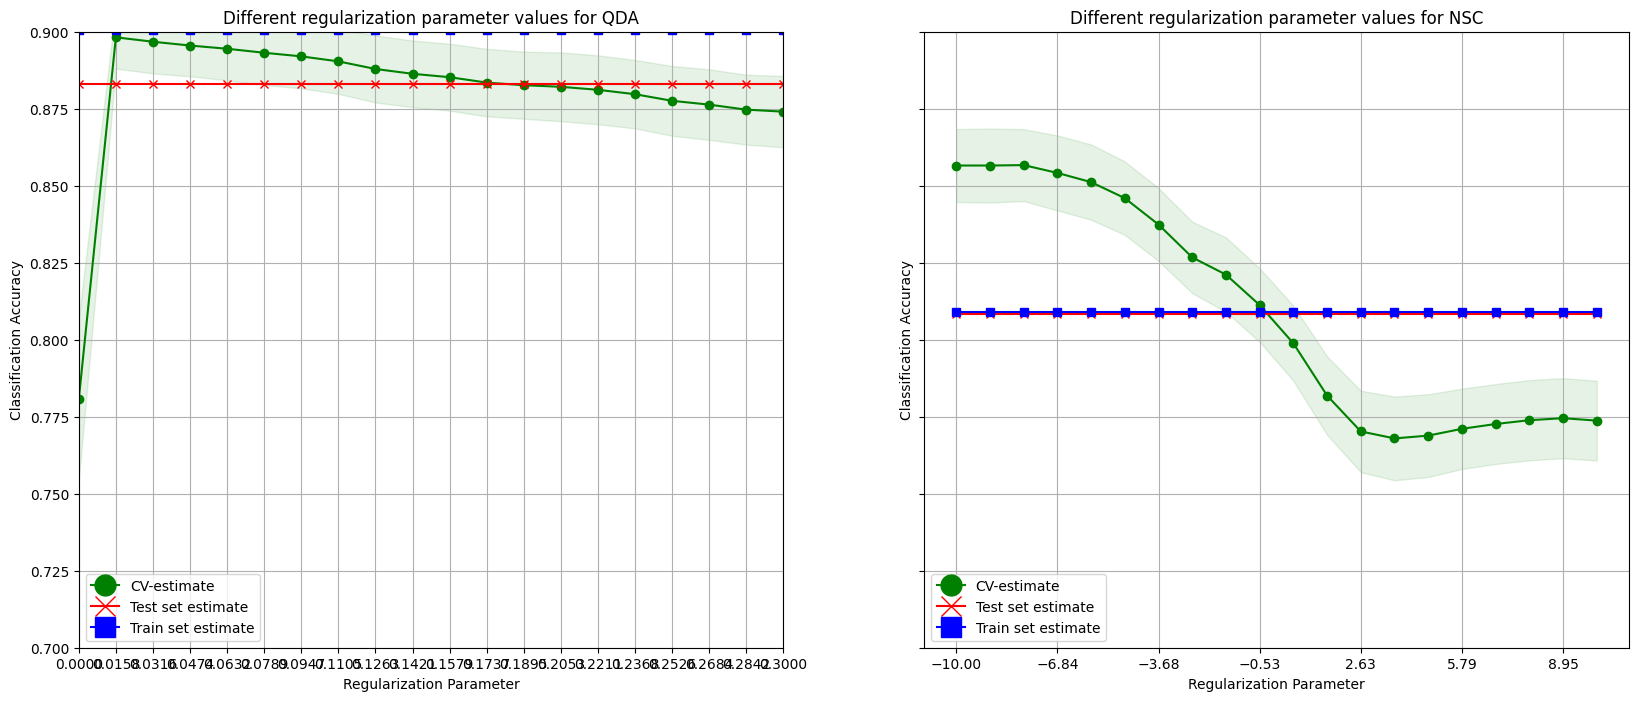

In [23]:

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(20,8))
line1, = axarr[0].plot(reg_param_values, accuracies1, 'o-', color="g")
line2, = axarr[0].plot(reg_param_values, test_accuracies/n, 'x-', color="r")
line3, = axarr[0].plot(reg_param_values, train_accuracies/n, 's-', color="b")
axarr[0].fill_between(reg_param_values, accuracies1 - std_accuracies1 / np.sqrt(10), \
    accuracies1 + std_accuracies1 / np.sqrt(10), alpha=0.1, color="g")
axarr[0].grid()
axarr[0].set_title("Different regularization parameter values for QDA")
axarr[0].set_xlabel('Regularization Parameter')
axarr[0].set_xticks(np.array(reg_param_values))
axarr[0].set_ylabel('Classification Accuracy')
axarr[0].set_ylim((0.7, 0.9))
axarr[0].set_xlim((0.0, .3))
legend_handles = [ mlines.Line2D([], [], color='g', marker='o', \
                          markersize=15, label='CV-estimate'), \
                mlines.Line2D([], [], color='r', marker='x', \
                          markersize=15, label='Test set estimate'),\
                mlines.Line2D([], [], color='b', marker='s', \
                          markersize=15, label='Train set estimate')]
axarr[0].legend(handles=legend_handles, loc = 3)


line1, = axarr[1].plot(shrinkage_param_values, accuracies_nsc1, 'o-', color="g")
line2, = axarr[1].plot(shrinkage_param_values, test_accuracies_nsc/n, 'x-', color="r")
line3, = axarr[1].plot(shrinkage_param_values, train_accuracies_nsc/n, 's-', color="b")
axarr[1].fill_between(shrinkage_param_values, accuracies_nsc1 - std_accuracies_nsc1 / np.sqrt(10), \
    accuracies_nsc1 + std_accuracies_nsc1 / np.sqrt(10), alpha=0.1, color="g")
axarr[1].grid()
axarr[1].set_title("Different regularization parameter values for NSC")
axarr[1].set_xlabel('Regularization Parameter')
axarr[1].set_xticks(shrinkage_param_values[ 0::3 ])
axarr[1].set_ylabel('Classification Accuracy')
axarr[1].set_ylim((0.7, 0.9))
legend_handles = [ mlines.Line2D([], [], color='g', marker='o', \
                          markersize=15, label='CV-estimate'), \
                mlines.Line2D([], [], color='r', marker='x', \
                          markersize=15, label='Test set estimate'),\
                mlines.Line2D([], [], color='b', marker='s', \
                          markersize=15, label='Train set estimate')]
axarr[1].legend(handles=legend_handles, loc = 3)

plt.show()

In [24]:
print(shrinkage_param_values[ np.argmax(accuracies_nsc1) ]) 

-7.894736842105264


In [25]:
print(reg_param_values[ np.argmax(accuracies1) ])

0.015789473684210527


## Fitting the Final Model and Estimating Its Performance
### Naive Bayes

[[188.1  21. ]
 [ 20.4 100.5]]
Predicion accuracy is: 0.874545
True postive rate is: 0.831266
True negative rate is: 0.899570



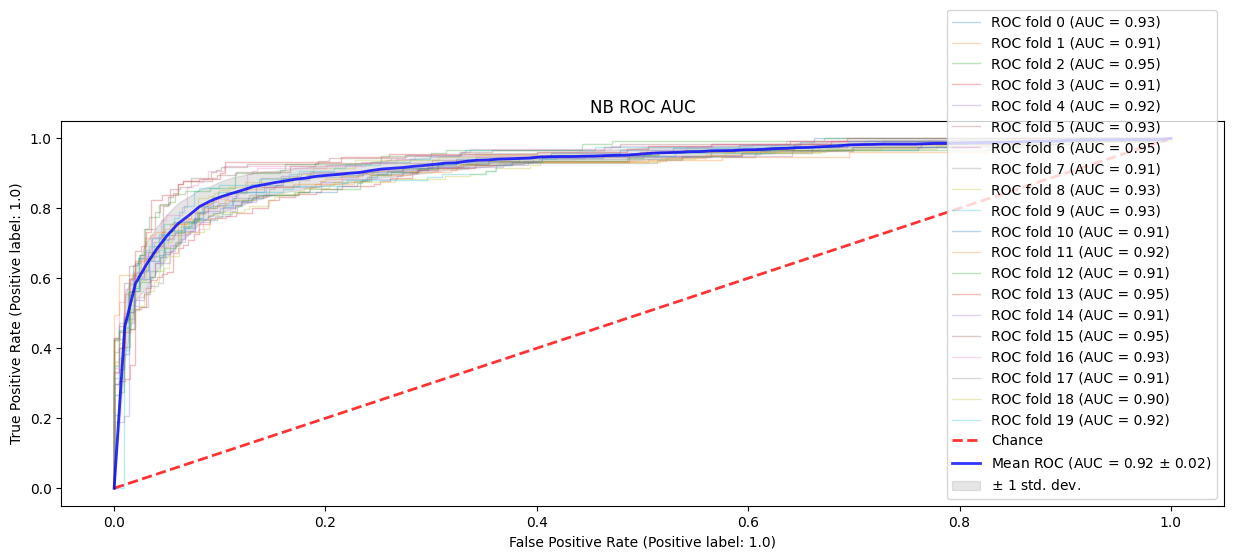

In [26]:


import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold



conf =[0][0]
y_pred_b=[None]*n

conf =[0][0]
y_pred_b=[None]*n
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()


for i in range(20):    
    nb = GaussianNB()
    nb.fit(X_train_b_scaled[i], y_train_b[i])
    y_pred_b[i] = nb.predict(X_test_b_scaled[i])

    conf = conf + confusion_matrix(y_test_b[i], y_pred_b[i])

    # The matrix conf contains:
    # TN | FN
    # FP | TP

    TN = conf[0][0]/n
    TP = conf[1][1]/n
    FP = conf[0][1]/n
    FN = conf[1][0]/n
    
    viz = RocCurveDisplay.from_estimator(
        nb,
        X_test_b_scaled[i],
        y_test_b[i],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
pnb=((TP + TN) / (TN + TP + FP + FN))
print(conf/n)
print('Predicion accuracy is: %f' % ((TP + TN) / (TN + TP + FP + FN)))
print('True postive rate is: %f' % (TP / (TP + FN)))
print('True negative rate is: %f\n' % (TN / (TN + FP)))


ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="NB ROC AUC",
)
ax.legend(loc="lower right")
plt.show()

### Linear Discriminant

[[187.3  21.8]
 [ 12.2 108.7]]
Predicion accuracy is: 0.896970
True postive rate is: 0.899090
True negative rate is: 0.895744



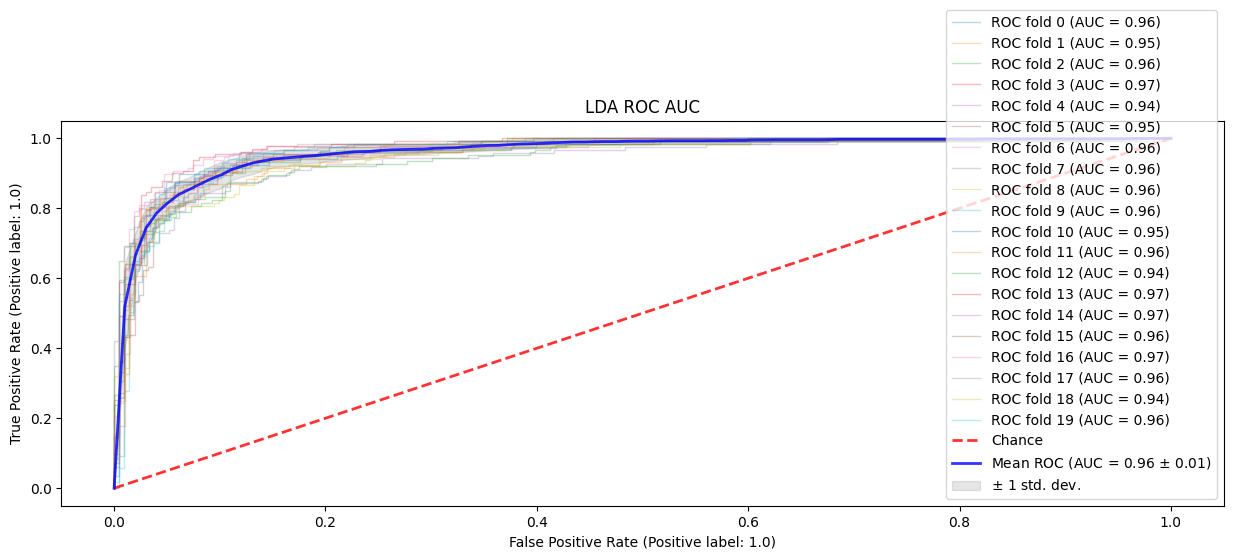

In [40]:

conf =[0][0]
y_pred_b=[None]*n
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()


for i in range(20):   
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train_b_scaled[i], y_train_b[i])

    y_pred_b[i] = lda.predict(X_test_b_scaled[i])

    conf = conf + confusion_matrix(y_test_b[i], y_pred_b[i])

    # The matrix conf contains:
    # TN | FN
    # FP | TP

    TN = conf[0][0]/n
    TP = conf[1][1]/n
    FP = conf[0][1]/n
    FN = conf[1][0]/n
    
    viz = RocCurveDisplay.from_estimator(
        lda,
        X_test_b_scaled[i],
        y_test_b[i],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
plda=((TP + TN) / (TN + TP + FP + FN))
print(conf/n)
print('Predicion accuracy is: %f' % ((TP + TN) / (TN + TP + FP + FN)))
print('True postive rate is: %f' % (TP / (TP + FN)))
print('True negative rate is: %f\n' % (TN / (TN + FP)))




ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="LDA ROC AUC",
)
ax.legend(loc="lower right")
plt.show()

### Quadratic Discriminant

[[188.    21.1 ]
 [ 13.65 107.25]]
Predicion accuracy is: 0.894697
True postive rate is: 0.887097
True negative rate is: 0.899091



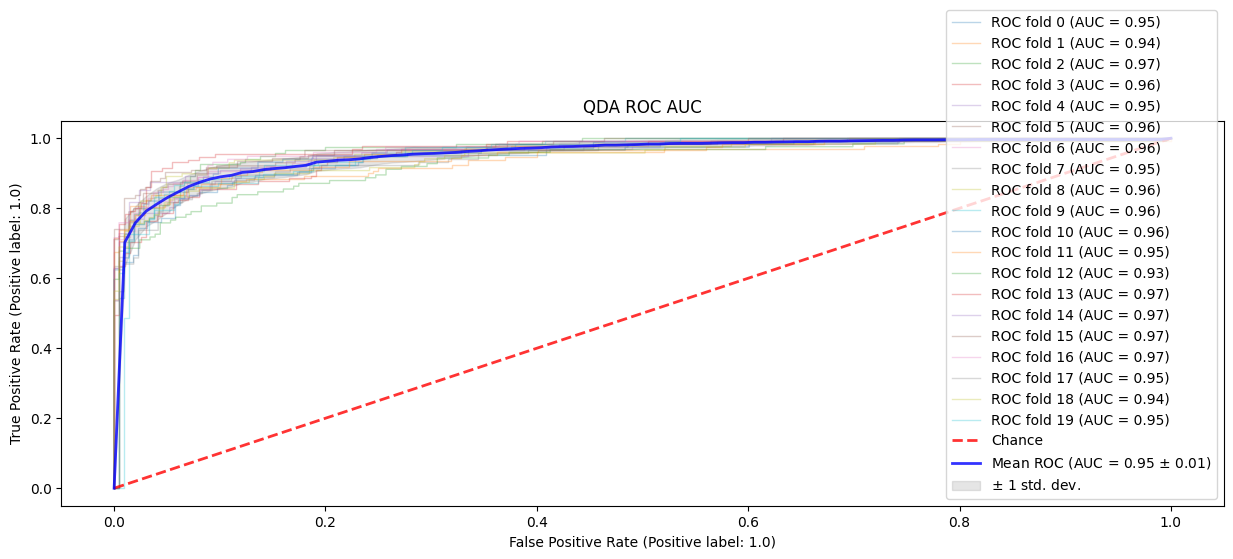

In [29]:
conf =[0][0]
y_pred_b=[None]*n

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()


for i in range(20):   
    qda = QuadraticDiscriminantAnalysis(reg_param = reg_param_values[ np.argmax(accuracies[i]) ])
    qda.fit(X_train_b_scaled[i], y_train_b[i])

    y_pred_b[i] = qda.predict(X_test_b_scaled[i])

    conf = conf + confusion_matrix(y_test_b[i], y_pred_b[i])

    # The matrix conf contains:
    # TN | FN
    # FP | TP

    TN = conf[0][0]/n
    TP = conf[1][1]/n
    FP = conf[0][1]/n
    FN = conf[1][0]/n

    viz = RocCurveDisplay.from_estimator(
        qda,
        X_test_b_scaled[i],
        y_test_b[i],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
pqda=((TP + TN) / (TN + TP + FP + FN))
print(conf/n)
print('Predicion accuracy is: %f' % ((TP + TN) / (TN + TP + FP + FN)))
print('True postive rate is: %f' % (TP / (TP + FN)))
print('True negative rate is: %f\n' % (TN / (TN + FP)))


ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="QDA ROC AUC",
)
ax.legend(loc="lower right")
plt.show()

### Nearest Crentroid


In [30]:
conf =[0][0]
y_pred_b=[None]*n



for i in range(20):   
    nsc = NearestCentroid(shrink_threshold = shrinkage_param_values[ np.argmax(accuracies_nsc[i]) ])
    nsc.fit(X_train_b_scaled[i], y_train_b[i])

    y_pred_b[i] = nsc.predict(X_test_b_scaled[i])

    conf = conf + confusion_matrix(y_test_b[i], y_pred_b[i])

    # The matrix conf contains:
    # TN | FN
    # FP | TP

    TN = conf[0][0]/n
    TP = conf[1][1]/n
    FP = conf[0][1]/n
    FN = conf[1][0]/n

pnsc=((TP + TN) / (TN + TP + FP + FN))
print(conf/n)
print('Predicion accuracy is: %f' % ((TP + TN) / (TN + TP + FP + FN)))
print('True postive rate is: %f' % (TP / (TP + FN)))
print('True negative rate is: %f\n' % (TN / (TN + FP)))

[[177.55  31.55]
 [ 16.4  104.5 ]]
Predicion accuracy is: 0.854697
True postive rate is: 0.864351
True negative rate is: 0.849115



## Plot comparativo

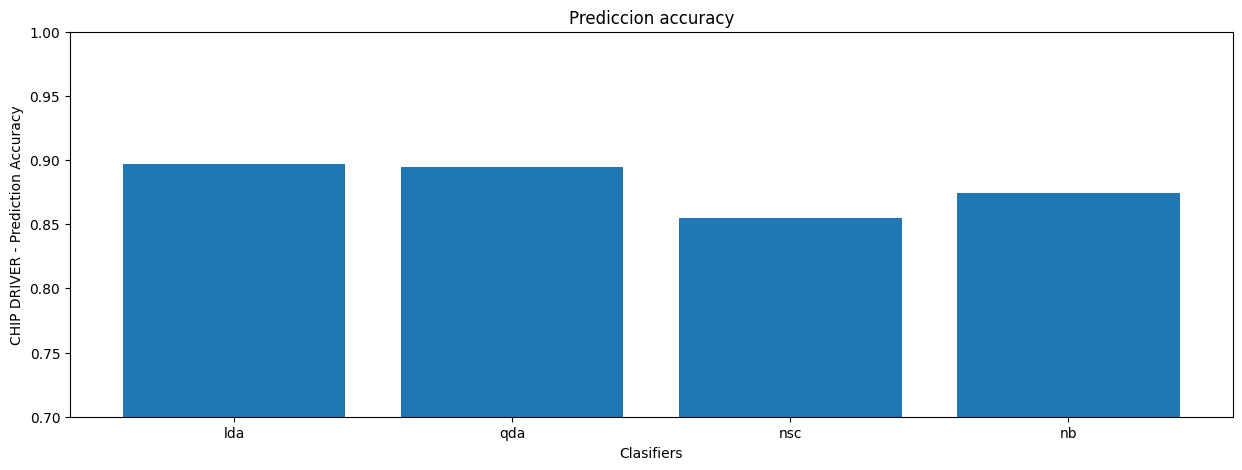

In [41]:
plt.bar(["lda", "qda", "nsc", "nb"],[plda, pqda, pnsc, pnb])
plt.ylim((0.7, 1))
plt.title("Prediccion accuracy")
plt.xlabel('Clasifiers')
plt.ylabel('CHIP DRIVER - Prediction Accuracy')
plt.show()

## Plotting decision boundaries

In [32]:
def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black',
                              linewidth=2, zorder=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


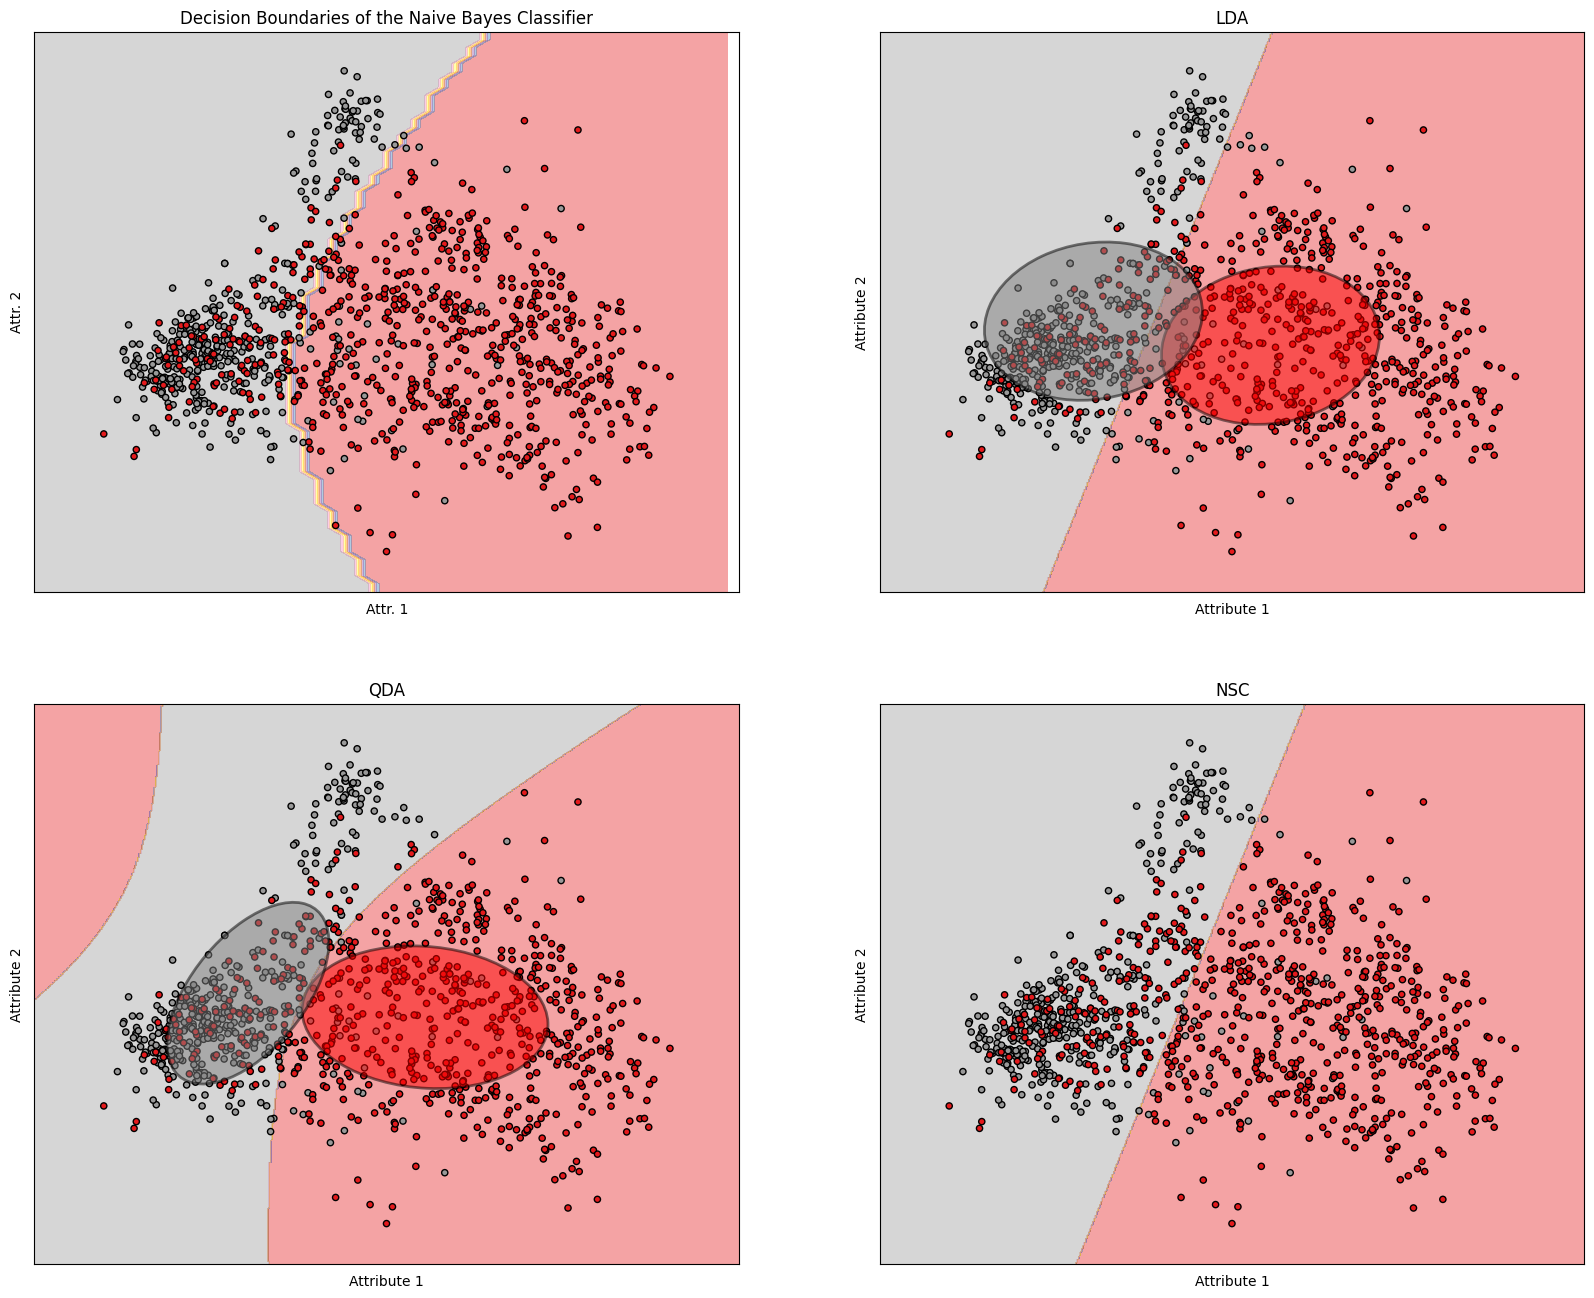

In [33]:
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(20, 16))

X = np.array(X_b)[:, [0, 1]]
X_scaled = preprocessing.scale(X)
nb.fit(X_scaled, y_b)
x_min, x_max = X_scaled[:, 0].min() - .5, X_scaled[:, 0].max() + .5
y_min, y_max = X_scaled[:, 1].min() - .5, X_scaled[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[ 0,0 ].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
axarr[ 0,0 ].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_b, s=20, edgecolor='k',\
        cmap=plt.cm.Set1)
axarr[ 0,0 ].set_title('Decision Boundaries of the Naive Bayes Classifier')
axarr[ 0,0 ].set_xlabel('Attr. 1')
axarr[ 0,0 ].set_ylabel('Attr. 2')



lda =  LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_scaled, y_b)

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_scaled, y_b)

nsc = NearestCentroid()
nsc.fit(X_scaled, y_b)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))



Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[0,1].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
axarr[0,1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_b, s=20, edgecolor='k',\
    cmap=plt.cm.Set1)
axarr[0,1].set_title('LDA')
axarr[0,1].set_xlabel('Attribute 1')
axarr[0,1].set_ylabel('Attribute 2')

plot_ellipse(axarr[0,1], lda.means_[0], lda.covariance_, 'red')
plot_ellipse(axarr[0,1], lda.means_[1], lda.covariance_, 'gray')

Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[1,0].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
axarr[1,0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_b, s=20, edgecolor='k',\
    cmap=plt.cm.Set1)
axarr[1,0].set_title('QDA')
axarr[1,0].set_xlabel('Attribute 1')
axarr[1,0].set_ylabel('Attribute 2')

plot_ellipse(axarr[1,0], qda.means_[0], qda.covariance_[0], 'red')
plot_ellipse(axarr[1,0], qda.means_[1], qda.covariance_[1], 'gray')


Z = nsc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axarr[1,1].contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)
axarr[1,1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_b, s=20, edgecolor='k',\
    cmap=plt.cm.Set1)
axarr[1,1].set_title('NSC')
axarr[1,1].set_xlabel('Attribute 1')
axarr[1,1].set_ylabel('Attribute 2')






plt.show()